In [1]:
import time
import numpy as np

In [2]:
def blue_repump(on: bool):
    if on:
        flip_mirror_switch_ni.set_state(state="On", switch="Mirror")
    else:
        flip_mirror_switch_ni.set_state(state="Off", switch="Mirror")

In [16]:
blue_repump(True)

In [15]:
blue_repump(True)
time.sleep(0.01)

blue_repump(False)

In [12]:
timetaggerlogic.counter.getDataNormalized()[0].mean()

345.8

In [18]:
def load_swabian_sequence(self, seq):
    """ Upload a pattern to a sequence and the sequence to the pulsetreamer in a simple native way.
    """
    _seq = pulse_streamer.createSequence()
    for key in seq.keys():
        if seq[key]:
            if 'd' in key:
                _seq.setDigital(int(key[-1]), seq[key])    
            else:
                _seq.setAnalog(int(key[-1]),seq[key])

In [ ]:
seq = {
    "d"
}

In [ ]:
self._pulser.load_swabian_sequence(self._make_pulse_sequence(HWRecorderMode.PIXELCLOCK, integration_time))

In [2]:
from qudi.interface.pulser_interface import PulserInterface, PulserConstraints
import pulsestreamer as ps
from qudi.logic.pulsed.pulse_objects import PulseBlockElement, PulseBlock, PulseBlockEnsemble, PulseSequence
from qudi.logic.pulsed.sampling_functions import SamplingFunctions

In [3]:
def start_pulsed(enabled, ensemble_name):
    pulsed_master_logic.sigSampleBlockEnsemble.emit(ensemble_name)
    pulsed_master_logic.sigLoadBlockEnsemble.emit(ensemble_name) 
    pulsed_master_logic.sigPulserRunningUpdated.emit(enabled)    

In [12]:
_laser_channel = 3
_mw_channel = 8
_trig_channel = 6
element_list = []

channels = {'d_ch1': 0.0 , 'd_ch2': 0.0 , 'd_ch3': 0.0 , 'd_ch4': 0.0 , 'd_ch5': 0.0 , 'd_ch6': 0.0 , 'd_ch7': 0.0 , 'd_ch8': 0.0 , 'a_ch1': SamplingFunctions.Idle(), 'a_ch2': SamplingFunctions.Idle()}
clear = lambda x: {i:0 for i in x.keys()}
d_ch = lambda x: f'd_ch{x}'
a_ch = lambda x: f'a_ch{x}'

seq = PulseSequence("rabiDyi")

for rep in range(50):
    channels = clear(channels)
    element_list.append(
        PulseBlockElement(init_length_s = 1e-6, digital_high = channels)
        )

    channels = clear(channels)
    channels[d_ch(_mw_channel)] = 1.0
    element_list.append(
        PulseBlockElement(init_length_s = 10e-9 + 10 * rep * 1e-9, digital_high = channels)
    )
    channels = clear(channels)
    channels[d_ch(_laser_channel)] = 1.0
    element_list.append(
        PulseBlockElement(init_length_s = 1e-6, digital_high = channels)
        )

    channels = clear(channels)
    channels[d_ch(_trig_channel)] = 1.0
    element_list.append(PulseBlockElement(init_length_s = 100e-9, digital_high = channels))

pulse_block = PulseBlock(name='rabiDyi', element_list=element_list)
pulsed_master_logic.sigSavePulseBlock.emit(pulse_block)
block_list = [(pulse_block.name, 0)]
block_ensemble = PulseBlockEnsemble(name='rabiDyi', block_list=block_list, rotating_frame=False)
pulsed_master_logic.sigSaveBlockEnsemble.emit(block_ensemble)
pulsed_master_logic.sigSampleBlockEnsemble.emit('rabiDyi')
pulsed_master_logic.sigLoadBlockEnsemble.emit('rabiDyi') 


True

In [13]:
start_pulsed(True, "rabiDyi")

In [14]:
pulsed_master_logic.sigSavePulseBlock

In [8]:
pulse_dict = _make_pulse_sequence()

TypeError: PulseSequence ensemble list entries must be either:
	- a tuple or list of length 2 with one entry being the PulseBlockEnsemble name and the other being a sequence parameter dictionary
	- a str containing the PulseBlockEnsemble name
	- a dict containing the sequence parameters including the PulseBlockEnsemble name

In [7]:
blue_repump(True)

In [ ]:
ple_gui._mw.ple_widget.target_point.setValue(8581)

In [ ]:
high_finesse_wavemeter.start_acquisition()

0

In [ ]:
w1 = high_finesse_wavemeter.get_current_wavelength()

In [ ]:
w2 = high_finesse_wavemeter.get_current_wavelength()

In [ ]:
(w2 - w1)*1e6

-472.03431711295707

In [ ]:
n1 = timetaggerlogic.counter.getDataNormalized()[0]

In [ ]:
500e5 * 1e6 / 1e12

50.0

In [ ]:
nuclear_ = tagger.counter(channels=[1], bin_width=1e9, n_values=1e6)

In [ ]:
clicks = nuclear_.getData()

In [ ]:
clicks

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
click_idx = np.where([np.array(clicks) > 0])

In [ ]:
cl1 = click_idx[-1]

In [ ]:
cl2 = np.roll(click_idx[-1], -1)

In [ ]:
y,x = np.histogram((cl2-cl1)[:-1], bins=100, )

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
y

array([10749,  5334,  4077,  3319,  2707,  2390,  2049,  1703,  1424,
        1270,  1126,   960,   891,   747,   643,   532,   493,   447,
         376,   297,   316,   272,   224,   190,   189,   134,   136,
         131,    99,    99,    91,    82,    75,    42,    40,    55,
          39,    42,    29,    22,    16,    19,    19,    14,    14,
          23,     6,     8,    11,     6,     6,     5,     4,     8,
           1,     3,     6,     5,     2,     0,     2,     1,     2,
           0,     2,     0,     3,     2,     1,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           1], dtype=int64)

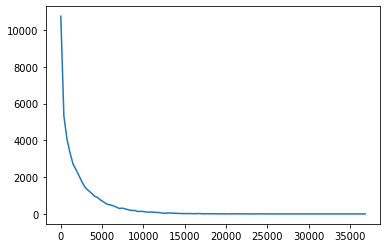

In [ ]:
plt.plot(x[:-1], y)

(array([49.,  5.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([1.000000e+00, 3.728300e+02, 7.446600e+02, 1.116490e+03,
       1.488320e+03, 1.860150e+03, 2.231980e+03, 2.603810e+03,
       2.975640e+03, 3.347470e+03, 3.719300e+03, 4.091130e+03,
       4.462960e+03, 4.834790e+03, 5.206620e+03, 5.578450e+03,
       5.950280e+03, 6.322110e+03, 6.693940e+03, 7.065770e+03,
       7.437600e+03, 7.809430e+03, 8.181260e+03, 8.553090e+03,
       8.924920e+03, 9.296750e+03, 9.668580e+03, 1.004041e+04,


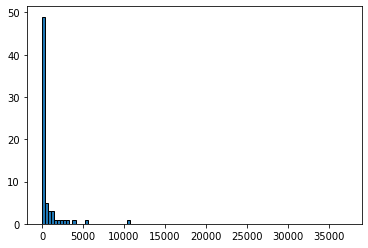

In [ ]:
plt.hist(y, bins=x, edgecolor='black')

In [ ]:
clicks[0][click_idx[-1]]

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
click_idx = np.where([np.array(clicks) > 0])

In [ ]:
click_idx

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([438270203, 438271560, 438278509, ..., 499990579, 499997485,
       499999822], dtype=int64))

In [ ]:
high_finesse_wavemeter._wavemeter.get_regulation_mode()

True

In [ ]:
high_finesse_wavemeter._wavemeter.set_regulation_mode(mode = True)

0

In [ ]:
high_finesse_wavemeter._wavemeter.set_deviation_signal(2000, channel=2)

0

In [ ]:
high_finesse_wavemeter._wavemeter.start_measurements()

In [ ]:
center = high_finesse_wavemeter._wavemeter.get_wavelength(channel=4)
high_finesse_wavemeter._wavemeter.set_reference_course(str(center), channel=2)

In [ ]:
high_finesse_wavemeter._wavemeter.set_regulation_mode(True)

0

In [23]:
def refocus_ple(range_ = 200, steps = 60, integrate=0.1):
    #Range in MHz
    range_ = range_ * 1e-6
    center = float(high_finesse_wavemeter._wavemeter.get_reference_course(channel=2).decode("utf-8"))
    counts = []

    for step in range(0, steps):
        high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - range_/2 + step * range_/steps}", channel=2)
        time.sleep(integrate)
        
        counts.append(timetaggerlogic.counter.getDataNormalized()[0][-10:].mean())
    time.sleep(integrate)
    high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - range_/2 + counts.index(max(counts)) * range_/steps}", channel=2)
    print(counts.index(max(counts)))
    return counts

def detune_ple(detune):
    detune = detune * 1e-6
    center = float(high_finesse_wavemeter._wavemeter.get_reference_course(channel=2).decode("utf-8"))
    high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - detune}", channel=2)

array([ 800.,  550.,  550.,  600.,  700.,  550.,  300.,  600.,  950.,
       1150.])

2


In [ ]:
blue_repump(True)


In [ ]:
detune_ple(-30)

In [ ]:
timetaggerlogic.counter.getDataNormalized()[0].mean()

685.3

In [ ]:
cts

[387.9, 379.7, 376.3, 376.6, 375.9, 375.6, 374.3, 373.5, 371.6, 366.8, 360.9, 357.8, 352.8, 345.9, 337.4, 330.4, 328.1, 328.6, 333.1, 333.5, 331.4, 333.0, 334.4, 329.8, 329.4, 327.7, 324.7, 326.2, 326.3, 326.5]

In [ ]:
cts = timetaggerlogic.counter.getDataNormalized()[0]

In [ ]:
cts[cts > 700].mean()

1183.9285714285713

In [24]:
%gui qt

In [25]:
from qtpy.QtCore import QTimer, QDateTime
from qtpy.QtWidgets import QApplication, QMainWindow, QLabel
import sys

In [18]:
blue_repump(True)
time.sleep(0.01)
blue_repump(False)

NameError: name 'blue_repump' is not defined

In [ ]:
timetaggerlogic.counter.getDataNormalized()[0][-10:].mean()

500.0

In [ ]:
cts = refocus_ple(range_ = 120, steps = 5, integrate=0.5)

1


In [26]:
def check_charge_state():
    cur_cts = timetaggerlogic.counter.getDataNormalized()[0][-10:].mean()
    if cur_cts < 450:
        blue_repump(True)
        time.sleep(0.01)
        blue_repump(False)
    # elif (cur_cts < 650):

    #     cts = refocus_ple(range_ = 120, steps = 5, integrate=0.5)
    # else:
    #     pass
    

In [ ]:
cts = refocus_ple(range_ = 120, steps = 5, integrate=0.5)

In [27]:

timer = QTimer()
timer.timeout.connect(check_charge_state)
timer.start(500)

In [68]:
timer.stop()


In [47]:
cts = refocus_ple(range_ = 200, steps = 8, integrate=0.5)

4


In [8]:
check_charge_state()

NameError: name 'time' is not defined

In [14]:
timetaggerlogic.counter.getDataNormalized()[0][:-10]

array([1000.,  650., 1150.,  600.,  850.,  800.,  900.,  700.,  700.,
        900.,  950., 1100., 1100.,  950.,  700., 1150., 1050.,  700.,
        550.,  950., 1100., 1050.,  900., 1150.,  600., 1000., 1000.,
        750.,  750.,  900.,  700.,  650.,  850., 1000., 1100., 1150.,
        450.,  700., 1000., 1000.,  800.,  650.,  450.,  450.,  850.,
        550.,  750.,  700.,  700., 1500.,  800.,  700.,  750.,  800.,
       1200.,  400.,  950.,  650.,  750., 1200.,  700.,  650.,  600.,
       1000., 1100., 1050., 1050.,  700., 1150.,  800.,  750.,  700.,
        500.,  750.,  950.,  600., 1350.,  750., 1150.,  450., 1150.,
        700.,  850.,  700.,  450.,  750.,  600.,  850.,  800.,  650.,
       1150.,  700., 1100.,  600., 1400., 1150., 1300., 1000., 1400.,
       1100.,  800.,  900.,  700., 1050., 1050.,  500.,  600.,  650.,
        650., 1050., 1150.,  650., 1000.,  450.,  700.,  700.,  750.,
        600.,  650.,  900.,  850., 1000., 1100.,  950.,  750.,  650.,
        650.,  450.,

In [17]:
%inline

UsageError: Line magic function `%inline` not found.


In [21]:
from matplotlib import pyplot as plt

In [22]:
pulsestreamer._seq.plot()
plt.show()

In [16]:
pulsestreamer._seq

In [1]:
tagger.set

<qudi.hardware.swabian_instruments.timetagger_api.TT(0x1c8552deb40) at 0x000001C8584C3080>